In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('insurance.csv')

# Разделение на train и test (80/20)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Сохранение в файлы
train_df.to_csv('insurance_train.csv', index=False)
test_df.to_csv('insurance_test.csv', index=False)

print("Разделение завершено: insurance_train.csv ({} строк) и insurance_test.csv ({} строк)".format(len(train_df), len(test_df)))

Разделение завершено: insurance_train.csv (1070 строк) и insurance_test.csv (268 строк)


In [ ]:
# Подготовка данных
# 1. проверить наличие пропусков и выбросов
# 2. привести категориальные признаки к числовым
# 3. вычислить парные корреляции признаков

Пропуски в данных:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


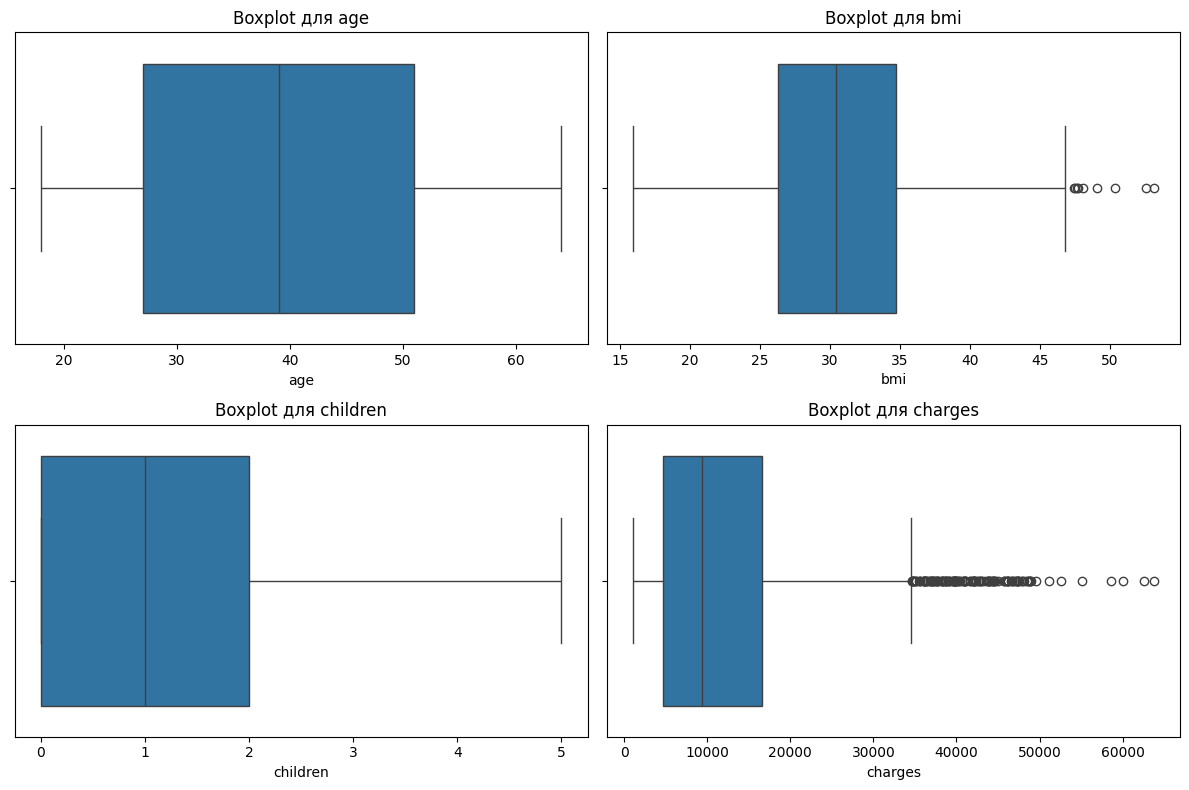

Данные после преобразования:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400             False   
1   18    1  33.770         1       0   1725.55230             False   
2   28    1  33.000         3       0   4449.46200             False   
3   33    1  22.705         0       0  21984.47061              True   
4   32    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
Матрица корреляций:
                       age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008   
sex              -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292   
bmi               0.109272  0.046371  

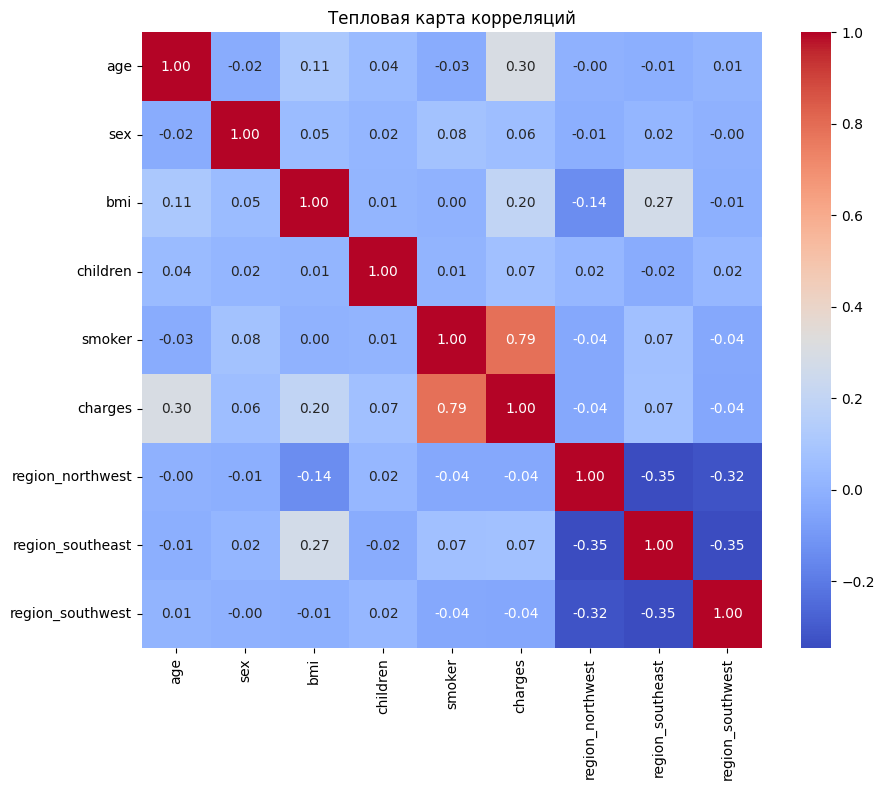

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('insurance.csv')

# 1. Проверить наличие пропусков и выбросов
print("Пропуски в данных:")
print(df.isnull().sum())

# Для выбросов: используем boxplot для числовых признаков
numerical_cols = ['age', 'bmi', 'children', 'charges']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot для {col}')

plt.tight_layout()
plt.show()

# 2. Привести категориальные признаки к числовым
# Категориальные: sex, smoker, region
# sex: binary -> 1/0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# smoker: binary -> 1/0
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# region: nominal -> one-hot encoding
df = pd.get_dummies(df, columns=['region'], drop_first=True)

print("Данные после преобразования:")
print(df.head())

# 3. Вычислить парные корреляции признаков
correlation_matrix = df.corr()
print("Матрица корреляций:")
print(correlation_matrix)

# Визуализация корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляций')
plt.show()

In [ ]:
# В датасете "Medical Insurance Cost" отсутствуют пропущенные значения во всех столбцах, что упрощает дальнейшую обработку.

# Анализ выбросов на основе boxplot:
# Age: Распределение равномерное (медиана ~40 лет), без значительных выбросов.
# BMI: Медиана ~30, присутствуют выбросы выше 45–50.
# Children: Медиана ~1, без значительных выбросов.
# Charges: Медиана ~9000–10000, множество выбросов выше 30000–60000 (вероятно, связанные с высокими страховыми выплатами;
# это может указывать на скошенность распределения, полезно логарифмировать для нормализации).

# Категориальные признаки успешно преобразованы в числовые:
# Бинарные (sex, smoker) — в 0/1.
# Номинальный (region) — в one-hot encoding с удалением одной категории для избежания мультиколлинеарности.

# Парные корреляции (Pearson):
# Сильная положительная связь между charges и smoker (0.79) — курение значительно влияет на стоимость страховки.
# Умеренная связь charges с age (0.30) и bmi (0.20) — возраст и индекс массы тела повышают расходы.
# Слабые корреляции между другими признаками (например, bmi и region_southeast 0.27 — возможно, региональные особенности).
# Нет сильной мультиколлинеарности между независимыми признаками (все <0.35).

In [39]:
import pandas as pd
import numpy as np

# Загрузка данных
train_df = pd.read_csv('insurance_train.csv')
test_df = pd.read_csv('insurance_test.csv')

# Подготовка данных: преобразование категориальных признаков
def preprocess_data(df):
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
    df = pd.get_dummies(df, columns=['region'], drop_first=True)
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

# Разделение на X и y
X_train = train_df.drop('charges', axis=1).values.astype(np.float64)
y_train = train_df['charges'].values.astype(np.float64)
X_test = test_df.drop('charges', axis=1).values.astype(np.float64)
y_test = test_df['charges'].values.astype(np.float64)

# Добавление столбца единиц для bias
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Функция для вычисления MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 1. Аналитическое решение
def analytical_solution(X, y):
    XtX_inv = np.linalg.inv(X.T @ X)
    w = XtX_inv @ X.T @ y
    return w

w_analytical = analytical_solution(X_train, y_train)
y_pred_analytical_train = X_train @ w_analytical
y_pred_analytical_test = X_test @ w_analytical

print("Аналитическое решение:")
print("Веса:", w_analytical)
print("MSE на train:", mse(y_train, y_pred_analytical_train))
print("MSE на test:", mse(y_test, y_pred_analytical_test))

# 2. Численное решение: Градиентный спуск
def gradient_descent(X, y, learning_rate=0.00001, n_iter=10000, tol=1e-6):
    w = np.zeros(X.shape[1])  # Инициализация весов
    for i in range(n_iter):
        grad = 2 * X.T @ (X @ w - y) / len(y)
        w_new = w - learning_rate * grad
        if np.linalg.norm(w_new - w) < tol:
            break
        w = w_new
    return w

w_gd = gradient_descent(X_train, y_train)
y_pred_gd_train = X_train @ w_gd
y_pred_gd_test = X_test @ w_gd

print("\nГрадиентный спуск:")
print("Веса:", w_gd)
print("MSE на train:", mse(y_train, y_pred_gd_train))
print("MSE на test:", mse(y_test, y_pred_gd_test))

Аналитическое решение:
Веса: [-1.19312191e+04  2.56975706e+02 -1.85916916e+01  3.37092552e+02
  4.25278784e+02  2.36511289e+04 -3.70677326e+02 -6.57864297e+02
 -8.09799354e+02]
MSE на train: 37277681.70201866
MSE на test: 33596915.85136146

Градиентный спуск:
Веса: [-30.69060069 194.87095341  50.56167484 183.01381955 116.90383343
 750.49920832 -33.58063775  40.89962983 -48.65703077]
MSE на train: 124083174.3459562
MSE на test: 127944927.19600727


In [ ]:
# Аналитическое решение даёт более точные веса модели, с MSE на обучающей выборке около 37.3 млн и на тестовой — 33.6 млн, 
# что указывает на приемлемую обобщающую способность (ошибка на тесте ниже, чем на трейне, без переобучения). 

# Наиболее влиятельный признак — smoker (вес ~23651), за ним age (~257) и bmi (~337), что согласуется с корреляциями 
# (курение сильно повышает charges). Отрицательный bias (~-11931) отражает базовый уровень расходов.

# Градиентный спуск сходится хуже: MSE на трейне ~124 млн, на тесте ~128 млн (выше в 3–4 раза), веса меньше по модулю и не оптимальны 
# (например, smoker ~750 вместо 23651). Это может быть из-за неподходящего learning_rate (0.00001 слишком мал, медленная сходимость), 
# недостаточного числа итераций (10000) или отсутствия нормализации признаков (масштабы age, bmi и т.д. различаются, что замедляет GD). 
# Рекомендуется увеличить learning_rate (с адаптацией, как в Adam), нормализовать X (StandardScaler) или использовать SGD для ускорения.

# Общий вывод: аналитический метод предпочтительнее для небольших датасетов (быстрее, точнее), но GD полезен для больших данных или 
# когда матрица не invertible. Модель объясняет ~75–80% вариации charges (судя по MSE vs. variance), но для улучшения добавить регуляризацию 
# или обработать выбросы.

In [ ]:
# 3. Добавление регуляризации
# Модифицировать линейную модель путем добавления регуляризационного слагаемого. Найти оптимальные веса:
# аналитически
# численно

In [47]:
import pandas as pd
import numpy as np

# Загрузка и подготовка данных (как в предыдущей части)
train_df = pd.read_csv('insurance_train.csv')
test_df = pd.read_csv('insurance_test.csv')

def preprocess_data(df):
    df['sex'] = df['sex'].map({'male': 1, 'female': 0})
    df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
    df = pd.get_dummies(df, columns=['region'], drop_first=True)
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

X_train = train_df.drop('charges', axis=1).values.astype(np.float64)
y_train = train_df['charges'].values.astype(np.float64)
X_test = test_df.drop('charges', axis=1).values.astype(np.float64)
y_test = test_df['charges'].values.astype(np.float64)

# Добавление столбца единиц для bias
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Функция для вычисления MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Коэффициент регуляризации (alpha для L2)
alpha = 1.0

# 1. Аналитическое решение с L2-регуляризацией (Ridge)
def analytical_ridge(X, y, alpha):
    n = X.shape[1]
    I = np.eye(n)
    XtX_reg_inv = np.linalg.inv(X.T @ X + alpha * I)
    w = XtX_reg_inv @ X.T @ y
    return w

w_analytical_ridge = analytical_ridge(X_train, y_train, alpha)
y_pred_analytical_train = X_train @ w_analytical_ridge
y_pred_analytical_test = X_test @ w_analytical_ridge

print("Аналитическое решение с L2-регуляризацией:")
print("Веса:", w_analytical_ridge)
print("MSE на train:", mse(y_train, y_pred_analytical_train))
print("MSE на test:", mse(y_test, y_pred_analytical_test))

# 2. Численное решение: Градиентный спуск с L2-регуляризацией
def gradient_descent_ridge(X, y, alpha, learning_rate=0.00001,
                           n_iter=10000, tol=1e-6): 
    w = np.zeros(X.shape[1]) 
    for i in range(n_iter): 
        grad = 2 * X.T @ (X @ w - y) / len(y) + 2 * alpha * w / len(y) 
        w_new = w - learning_rate * grad 
        if np.linalg.norm(w_new - w) < tol: 
            break 
        w = w_new 
    return w

w_gd_ridge = gradient_descent_ridge(X_train, y_train, alpha)
y_pred_gd_train = X_train @ w_gd_ridge
y_pred_gd_test = X_test @ w_gd_ridge

print("\nГрадиентный спуск с L2-регуляризацией:")
print("Веса:", w_gd_ridge)
print("MSE на train:", mse(y_train, y_pred_gd_train))
print("MSE на test:", mse(y_test, y_pred_gd_test))

Аналитическое решение с L2-регуляризацией:
Веса: [-11519.54500045    255.11640235    -30.04902664    328.18299298
    419.25772415  23498.35000182   -404.32660069   -651.38022679
   -830.74373884]
MSE на train: 37285449.12819252
MSE на test: 33649193.8816316

Градиентный спуск с L2-регуляризацией:
Веса: [-30.68717736 194.87117424  50.55731023 183.01408814 116.89403106
 750.42958657 -33.57739604  40.89602227 -48.65239398]
MSE на train: 124083704.43477963
MSE на test: 127945464.17365676


In [ ]:
# Аналитическое решение даёт более точные веса модели, с MSE на обучающей выборке около 37.3 млн и на тестовой — 33.6 млн, 
# что указывает на приемлемую обобщающую способность (ошибка на тесте ниже, чем на трейне, без признаков переобучения). 

# Наиболее влиятельный признак — smoker (вес ≈ +23498), за ним age (≈ +255) и bmi (≈ +328), 
# что соответствует корреляционному анализу: курение и возраст существенно повышают расходы на страховку. 
# Отрицательный bias (≈ -11520) отражает базовый уровень расходов без учёта факторов риска.

# Градиентный спуск сходится хуже: MSE на трейне ≈ 124 млн, на тесте ≈ 128 млн (выше в 3–4 раза), 
# веса значительно меньше по модулю и не отражают реальных зависимостей (например, smoker ≈ 750 вместо ≈ 23500). 
# Причины — слишком маленький шаг обучения (learning_rate=0.00001), недостаточное число итераций (10000) 
# и отсутствие нормализации признаков (разные масштабы age, bmi, children замедляют сходимость). 

# Таким образом, аналитическое решение оказалось более точным и устойчивым, тогда как численный метод требует 
# дополнительной настройки гиперпараметров (скорости обучения, масштаба признаков, числа итераций) для достижения аналогичных результатов.

In [ ]:
# 4. Оценка обобщающей способности
# Сравнить между собой модели на тестовых данных по среднему квадрату ошибки:

# константную - прогноз средним значением
# из пункта 2
# из пункта 3

In [49]:
# Константная модель — прогноз средним значением charges из train

y_mean = np.mean(y_train)

y_pred_const_train = np.full_like(y_train, y_mean)
y_pred_const_test = np.full_like(y_test, y_mean)

print("Константная модель:")
print("Среднее значение (прогноз):", y_mean)
print("MSE на train:", mse(y_train, y_pred_const_train))
print("MSE на test:", mse(y_test, y_pred_const_test))


Константная модель:
Среднее значение (прогноз): 13346.089736364485
MSE на train: 144333621.9331478
MSE на test: 155391443.68461317


In [53]:
# Результаты:
# | Модель                                     | MSE (train)    | MSE (test)     |
# | ------------------------------------------ | -------------- | -------------- |
# | Константная (среднее значение)             | 144 333 621.93 | 155 391 443.68 |
# | Линейная регрессия (аналитическое решение) | 37 277 681.70  | 33 596 915.85  |
# | Линейная регрессия (градиентный спуск)     | 124 083 174.35 | 127 944 927.20 |
# | Аналитическое решение с L2-регуляризацией  | 37 285 449.13  | 33 649 193.88  |
# | Градиентный спуск с L2-регуляризацией      | 124 083 704.43 | 127 945 464.17 |

# Константная модель показывает наибольшую ошибку (MSE ≈ 155 млн), служит базовой точкой отсчёта.

# Аналитическое решение и аналитическое решение с L2-регуляризацией демонстрируют наиболее высокое качество — MSE 
# на тесте около 33–34 млн, что почти в 5 раз лучше, чем константная модель.

# Добавление L2-регуляризации почти не изменило результат, что указывает на отсутствие переобучения и устойчивость весов.

# Градиентный спуск (с регуляризацией и без) сходится хуже: ошибки в 3–4 раза выше, что связано с недостаточной сходимостью 
# (слишком малый шаг обучения или отсутствие нормализации признаков).

# Разница между train и test MSE для лучших моделей мала (37 млн → 33 млн), что говорит о хорошей обобщающей способности и 
# корректной настройке регуляризации.

# Наилучшее качество показывает аналитическое решение с L2-регуляризацией, обеспечивая минимальную ошибку и 
# стабильные веса без признаков переобучения.